In [1]:
# First read the csv file containing the wrangled data
import pandas as pd
df=pd.read_csv('wrangled_data.csv')
df = df.rename(columns={'less_than_high_school_percentage_adults_only':'less_than_high_school_diploma',
                                  'high_school_diploma_percentage_adults_only':'high_school_diploma',
                                  'some_college_or_associate_degree_percentage':'some_college_or_associate_degree',
                                 'bachelors_or_higher_percentage':'bachelors_or_higher'})
df.head()

,state,county,rural_urban_continuum_code,less_than_high_school_diploma,high_school_diploma,some_college_or_associate_degree,bachelors_or_higher,poverty_percentage,population_estimate,unemployment_rate
0,AL,Autauga County,2.0,12.417,34.331,28.660,24.593,14.0,55416,5.3
1,AL,Baldwin County,3.0,9.972,28.692,31.788,29.547,12.0,208563,5.4
2,AL,Barbour County,6.0,26.236,34.927,25.969,12.868,30.0,25965,8.6
3,AL,Bibb County,1.0,19.302,41.816,26.883,12.000,20.0,22643,6.6
4,AL,Blount County,1.0,19.969,32.942,34.039,13.050,14.0,57704,5.5


In [ ]:
### Ignore this section
# Add two new columns to the DataFrame which show the percentage of people with diploma degree or lower and percentage of people
# with some degree more than diploma.
#df_extended['high_school_diploma_or_less']=df_extended.iloc[:,3]+df_extended.iloc[:,4]
#df_extended['more_than_high_school_diploma']=df_extended.iloc[:,5]+df_extended.iloc[:,6]

In [3]:
# I define an index called education index which varies between 0 and 100. 
# Higher number means lower education: 0 means all adult population have bachelors degree or higher, and 100 means all adult
# population are less than high school diploma
df_extended = df.copy()
df_extended['education_index']=(3*df_extended.iloc[:,3]+2*df_extended.iloc[:,4]+df_extended.iloc[:,5])/3
df_temp = df_extended.iloc[:,[0,1,-4,-1]]
df_temp.head()

,state,county,poverty_percentage,education_index
0,AL,Autauga County,14.0,44.857667
1,AL,Baldwin County,12.0,39.696000
2,AL,Barbour County,30.0,58.177000
3,AL,Bibb County,20.0,56.140333
4,AL,Blount County,14.0,53.276667


In [4]:
### Ignore this section
# Create a new data frame by melting the new data frame (with two education level) based on education level
#new_df1 = pd.melt(df_temp,id_vars=['state','county','poverty_percentage'],var_name='education_level',value_name='education_percentage')
#new_df1.head()

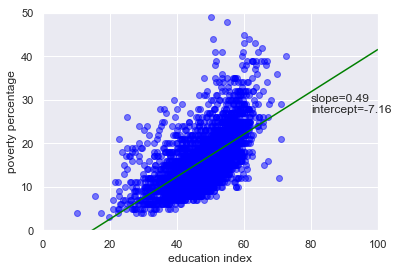

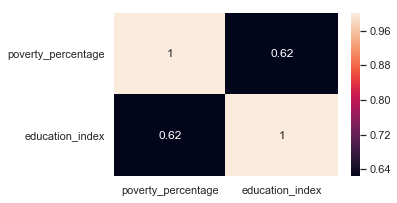

In [4]:
# The first plot shows how the poverty percentage varies based on the two education index
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
plt.scatter(df_temp['education_index'],df_temp['poverty_percentage'],color='blue',alpha=0.5)
x=np.array([0,100])
slope, intercept = np.polyfit(df_temp['education_index'],df_temp['poverty_percentage'],1)
plt.plot(x,slope*x+intercept,color='green')
plt.xticks()
plt.xlabel('education index')
plt.ylabel('poverty percentage')
plt.axis([0,100,0,50])
plt.annotate('slope='+str(round(slope,2))+'\nintercept='+str(round(intercept,2)),xy=(80,30),xytext=(80,27))
plt.show()
#sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df1,markers='.')
# The second plot shows the heat map
plt.figure(figsize=(5,3))
correlation_df1=df_temp.loc[:,['poverty_percentage','education_index']].corr()
sns.heatmap(correlation_df1,annot=True)
plt.show()

## Conclusion 1: Lower education results in higher poverty

In [23]:
### Ignore this section

# Then melt the extended dataframe (with more educational levels) on the education level
# df_temp = df_extended.iloc[:,[0,1,3,4,5,6,7]]
# new_df2 = pd.melt(df_temp, id_vars=['state','county','poverty_percentage'],
#                  var_name='education_level',value_name='education_percentage')
#sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df2)
#plt.show()

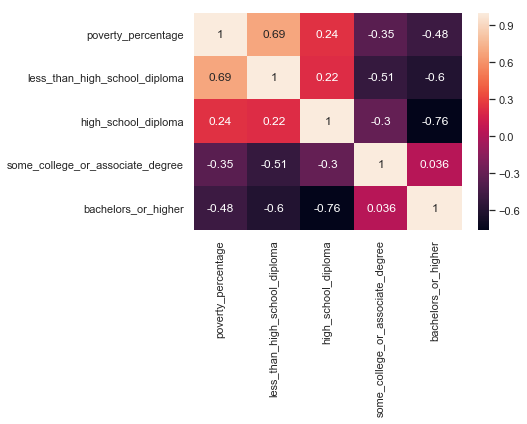

In [26]:
# The second plot shows more specificly the relationship between poverty and all four education levels
correlation_df2=df_extended.iloc[:,[7,3,4,5,6]].corr()
sns.heatmap(correlation_df2,annot=True)
plt.show()

#### Conclusion 2-1: The effect of having some associate/college degree or bachelors/higher degree on reducing poverty is similar to each other

#### Conclusion 2-2: Having a high school diploma helps reducing the poverty compared to not having it

## Conclusion 2: Gaining high school diploma or some associate/college degree improves the poverty the more than gaining a bachelors or higher degree does

In [22]:
### Ignore this section
# Rural-urban-continuum-code and its relationship with poverty and education
#new_df3 = df.groupby('rural_urban_continuum_code').mean()
#new_df3.iloc[:,0:4].plot.bar(stacked=True)
#plt.legend(bbox_to_anchor=(1,1), loc='upper left')
#plt.show()
#plt.close()
#sns.boxplot(x='rural_urban_continuum_code',y='poverty_percentage',data=df)
#plt.show()
#plt.figure(figsize=[5,3])
#correlation_df3=df_extended.iloc[:,[7,2]].corr()
#sns.heatmap(correlation_df3,annot=True)
#plt.show()

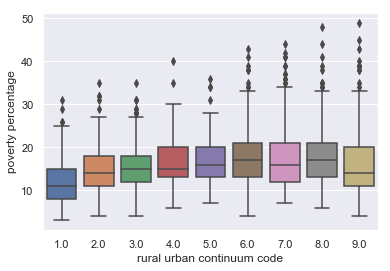

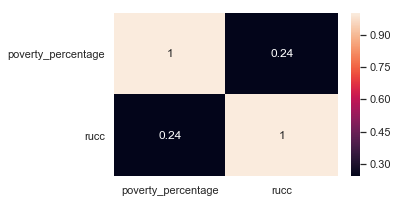

In [46]:
# Rural-urban-continuum-code and its relationship with poverty
sns.boxplot(x='rural_urban_continuum_code',y='poverty_percentage',data=df)
plt.xlabel('rural urban continuum code')
plt.ylabel('poverty percentage')
plt.show()
plt.figure(figsize=[5,3])
correlation_df3=df.loc[:,['poverty_percentage','rural_urban_continuum_code']].corr()
sns.heatmap(correlation_df3,annot=True,yticklabels=['poverty_percentage','rucc'],xticklabels=['poverty_percentage','rucc'])
plt.show()

#### Since the correlation between RUCC and poverty percentage is not too high, the correlation could exist by chance. Therefore, I run a hypothesis test
null hypothesis: There is no correlation between poverty percentage and RUCC

alternate hypothesis: There is a positive correlation between poverty percentage and RUCC

In [47]:
np.random.seed(132)
def draw_perm_corr(x,y,size=1):
    reps = np.empty(size)
    for i in range(size):
        x_perm = np.random.permutation(x)
        reps[i] = np.corrcoef(x_perm,y)[0,1]
    return reps
x=df_extended['poverty_percentage']
y=df_extended['rural_urban_continuum_code']
size = 1000
corr_reps = draw_perm_corr(x,y,size)
p = np.sum(corr_reps>=0.24)/len(corr_reps)
print('The probability of having a correlation of as small as 0.24 between RUCC and poverty is ',p)

The probability of having a correlation of as small as 0.24 between RUCC and poverty is  0.0


## Conclusion 3: There is positive correlation between RUCC and poverty

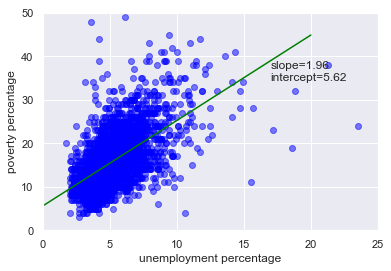

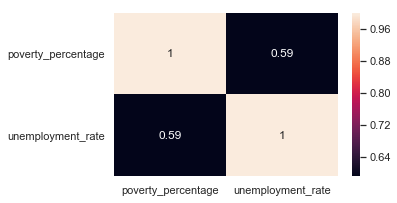

In [59]:
# it is helpful to take a look at the pair plot of unemployment and poverty
plt.close()
sns.set()
plt.scatter(df['unemployment_rate'],df['poverty_percentage'],color='blue',alpha=0.5)
x=np.array([0,20])
slope, intercept = np.polyfit(df['unemployment_rate'],df['poverty_percentage'],1)
plt.plot(x,slope*x+intercept,color='green')
plt.axis([0,25,0,50])
plt.xlabel('unemployment percentage')
plt.ylabel('poverty percentage')
plt.annotate('slope='+str(round(slope,2))+'\nintercept='+str(round(intercept,2)),xy=(17.5,40),xytext=(17,34.5))
plt.show()
#sns.lmplot(x='education_percentage',y='poverty_percentage',hue='education_level',data=new_df1,markers='.')
# The second plot shows the heat map
plt.figure(figsize=(5,3))
correlation_df5=df.loc[:,['poverty_percentage','unemployment_rate']].corr()
sns.heatmap(correlation_df5,annot=True)
plt.show()

## Conclusion 5: Higher unemployment results in higher poverty rate

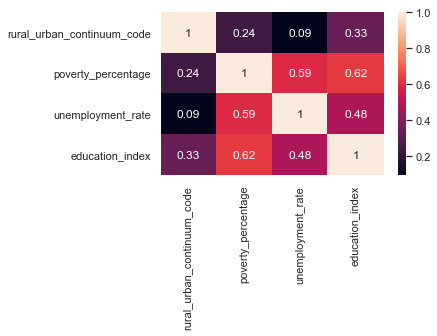

In [60]:
# At the end, I am investigating the correlation between education, unemployment, RUCC and poverty.
# In order to avoid dealing with four levels of education, I define an index called education index which varies between 0 and
# 100. Higher number means lower education: 0 means all adult population have bachelors degree or higher, and 100 means no adult
# population have high school diploma or higher
correlation_df6=df_extended.iloc[:,[2,7,9,10]].corr()
plt.figure(figsize=[5,3])
sns.heatmap(correlation_df6,annot=True)
plt.show()

## Conclusion 6: There is strong correlation between poverty, unemployment, and low education. They are correlated to RUCC as well.